In [1]:
# import sys
# !pip install tensorflow

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from sklearn.preprocessing import MinMaxScaler


In [4]:
# Load dataset
file_path = "chennai-ground-water-levels-2023.csv"  # Replace with actual file path
df = pd.read_csv(file_path)

In [5]:
# Columns for groundwater levels
months = ["Jan ", "Feb", "Mar", "Apr ", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
df_filtered = df[["Location"] + months]

In [11]:
# import sys
# print(sys.executable)

C:\Users\rumma\AppData\Local\Programs\Python\Python313\python.exe


In [12]:
# !{sys.executable} -m pip install tensorflow


ERROR: Could not find a version that satisfies the requirement tensorflow (from versions: none)

[notice] A new release of pip is available: 24.3.1 -> 25.0
[notice] To update, run: C:\Users\rumma\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for tensorflow


In [3]:
# !python -m pip show tensorflow

Name: tensorflow
Version: 2.18.0
Summary: TensorFlow is an open source machine learning framework for everyone.
Home-page: https://www.tensorflow.org/
Author: Google Inc.
Author-email: packages@tensorflow.org
License: Apache 2.0
Location: C:\Users\rumma\AppData\Roaming\Python\Python312\site-packages
Requires: tensorflow-intel
Required-by: 


In [6]:


# Select a specific location for forecasting (e.g., Kathivakkam)
location = "Kathivakkam"
df_location = df_filtered[df_filtered["Location"] == location].iloc[:, 1:].mean().to_frame()
df_location.columns = ["Groundwater Level"]
df_location.index = pd.date_range(start="2023-01", periods=12, freq="M")  # Monthly index



TypeError: Could not convert ['1.483.26' '1.5993.459' '1.533.48' '1.293.35' '1.383.268'] to numeric

In [7]:
# Convert monthly values to numeric
df_filtered[months] = df_filtered[months].apply(pd.to_numeric, errors='coerce')

C:\Users\rumma\AppData\Local\Temp\ipykernel_10124\829383978.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered[months] = df_filtered[months].apply(pd.to_numeric, errors='coerce')


In [8]:
# Select a specific location for forecasting (e.g., Kathivakkam)
location = "Kathivakkam"
df_location = df_filtered[df_filtered["Location"] == location].iloc[:, 1:].mean().to_frame()
df_location.columns = ["Groundwater Level"]
df_location.index = pd.date_range(start="2023-01", periods=12, freq="M")  # Monthly index

C:\Users\rumma\AppData\Local\Temp\ipykernel_10124\833634329.py:5: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_location.index = pd.date_range(start="2023-01", periods=12, freq="M")  # Monthly index


In [9]:
# Normalize Data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(df_location)


In [10]:
# Prepare Data for LSTM
sequence_length = 3  # Using last 3 months to predict the next month
X, y = [], []
for i in range(len(data_scaled) - sequence_length):
    X.append(data_scaled[i:i + sequence_length])
    y.append(data_scaled[i + sequence_length])

X, y = np.array(X), np.array(y)


In [11]:
# Split into training & testing sets
train_size = int(len(X) * 0.8)
X_train, X_test, y_train, y_test = X[:train_size], X[train_size:], y[:train_size], y[train_size:]


In [12]:
# Build LSTM Model
model = Sequential([
    LSTM(50, activation='relu', return_sequences=True, input_shape=(sequence_length, 1)),
    LSTM(50, activation='relu'),
    Dense(1)
])

model.compile(optimizer='adam', loss='mse')
model.fit(X_train, y_train, epochs=100, batch_size=8, verbose=1)

Epoch 1/100


d:\Capstone\El Nino\venv\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 2s 2s/step - loss: 0.5926
Epoch 2/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step - loss: 0.5823
Epoch 3/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step - loss: 0.5728
Epoch 4/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5636
Epoch 5/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step - loss: 0.5546
Epoch 6/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.5458
Epoch 7/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5372
Epoch 8/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - loss: 0.5287
Epoch 9/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step - loss: 0.5205
Epoch 10/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5122
Epoch 11/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.5040
Epoch 12/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4957
Epoch 13/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4874
Epoch 14/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step - loss: 0.4791
Epoch 15/100
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step - loss: 0.4706
Epoch 16/100
1/1 ━━━━━━━━━━━━━━━━

In [14]:
# Predict Next 6 Months
future_predictions = []
input_seq = data_scaled[-sequence_length:].reshape(1, sequence_length, 1)

for _ in range(6):  # Predict next 6 months
    next_value = model.predict(input_seq)[0]
    future_predictions.append(next_value)
    input_seq = np.append(input_seq[:, 1:, :], [[next_value]], axis=1)  # Slide window

# Convert back to original scale
future_predictions = scaler.inverse_transform(np.array(future_predictions).reshape(-1, 1))



1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step


C:\Users\rumma\AppData\Local\Temp\ipykernel_10124\3839166554.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  plt.plot(pd.date_range(start="2024-01", periods=6, freq="M"), future_predictions, marker='x', linestyle="dashed", label="Predicted")


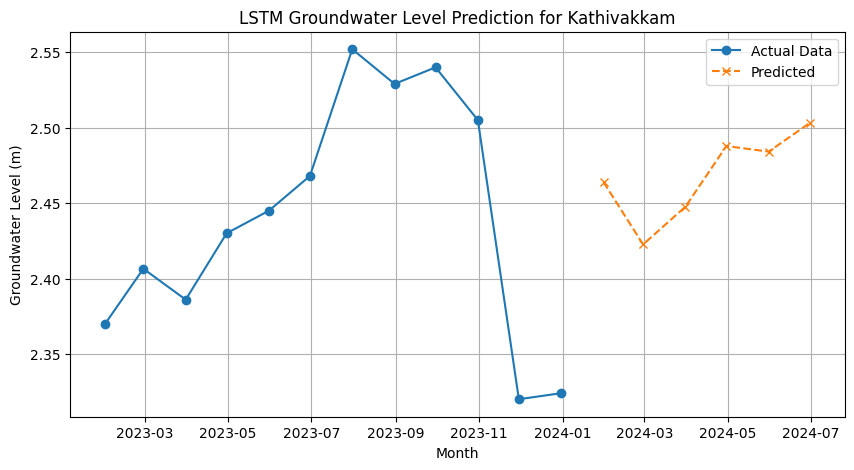

In [15]:
# Plot Results
plt.figure(figsize=(10, 5))
plt.plot(df_location.index, df_location["Groundwater Level"], marker='o', label="Actual Data")
plt.plot(pd.date_range(start="2024-01", periods=6, freq="M"), future_predictions, marker='x', linestyle="dashed", label="Predicted")
plt.xlabel("Month")
plt.ylabel("Groundwater Level (m)")
plt.title(f"LSTM Groundwater Level Prediction for {location}")
plt.legend()
plt.grid()
plt.show()